<h1>XGBoost</h1>
<ul>
    <li>
        <h3>XGBoost란?</h3>
        1. Regression과 Classification 문제 모두 해결 가능 <br/>
        2. 여러개의 Decision Tree를 조합하여 사용하는 Ensemble 알고리즘 -> 여러개를 조합하여 결과를 뽑아내는데, 정확도가 낮은 약한 모델을 여러개 조합하는 방식이 더 정확도가 높다는 방식에 기반 <br/>
        3. Boosting은 원리가 다른데 먼저 m1~3 모델이 있을때, m1에는 x에서 샘플링된 데이터를 넣는다. 그리고, 나온 결과중에서, 예측이 잘못된 x중의 값들에 가중치를 반영해서 다음 모델인 m2에 넣는다.  마찬가지로 y2 결과에서 예측이 잘못된 x’에 값들에 가중치를 반영해서 m3에 넣는다. 

그리고, 각 모델의 성능이 다르기 때문에, 각 모델에 가중치 W를 반영한다.
        
</ul>

<h1>파라미터</h1>
<ul>
    <li>
        병렬처리 – num_threads / nthread (★)
병렬처리시 처리할 쓰레드 기본값은 현재 사용가능한 쓰레드. 기본값설정 추천.
쓰레드말고 진짜 코어수대로 설정하라는 소리가 있는데 요즘은 안그래도 무방하다. 다만 다른작업이 필요한것같으면 코어 하나는 비워줘도 좋은 선택이다.
        <li>
훈련량 – learning_rate / eta (★★★)
0.05~0.1 정도로 맞추고 그 이상이면 다른 파라미터들을 튜닝할때 편. 미세한 정확도 조정을 원하면 더 작게 둬서 마른걸레를 빤다.
한번 다른 파라미터를 고정하면 바꿀필요가 없다. 또한 쓸데없이 긴 소수점으로 튜닝하는것도 별 쓰잘데기가 없다.
            <li>
반복량 – num_iterations / nrounds (★★★)
계속 나무를 반복하며 부스팅을 하는데 몇번을 할것인가이다. lgb는 기본값이 100이라 너무 적은편이다. 1000이상정도는 해주도록 한다. 너무나도 많이하면 당연히 오버피팅이 된다.
early_stopping이 있으면 최대한 많이 줘도 (10,000~)별 상관이 없다.
                <li>
조기멈춤 – early_stopping_round / early_stopping_rounds(★★)
validation셋에 더이상 발전이 없으면 그만두게 설정할때 이를 몇번동안 발전이 없으면 그만두게 할지 여부.
validation셋이 없으면 무용지물이다. testset은 무조건 정확도가 올라갈것이기에.
                    <li>
                        나무 깊이 – max_depth (★★★)
-1로 설정하면 제한없이 분기한다. 많은 feature가 있는 경우 더더욱 높게 설정하며, 파라미터 설정시 제일 먼저 설정한다.
default는 -1로 제한없이 분기한다.
                        <li>
                            잎사귀 수 – num_leaves / max_leaves (★)
결정트리는 이진트리 형태이기 때문에, depth가 4라면 (2의 4제곱 – 1) = 15로 설정하면 그 트리가 가질수 있는 최대 잎사귀 수이다.
최대 잎사귀수보다 작으면 규제(Regularization)으로 작동한다.
                            <li>
                                행 샘플링 – bagging_fraction / subsample (★★)
Row sampling, 즉 데이터를 일부 발췌해서 다양성을 높이는 방법으로 쓴다. 민감한 옵션이므로, Column sampling과 잘 섞어서 쓴다.
lightGBM의 GOSS옵션을 쓴다고 하면 해당 옵션을 쓰면 에러가 난다. GOSS에서 알아서 샘플링하는 과정이 있기 때문
                                <li>
                                    데이터 업데이트 주기 – baggin_freq / 부재 (★)
iteration 몇번째에 해당하는 데이터를 업데이트 할것인지.
XGBoost는 SGD를 구현하고 있기 때문에, 기본값인 1로 동작한다고 보면 된다. 영향도가 크지 않기 때문에 기본값 추천
                                    <li>
열 샘플링 – feature_fraction / colsample_bytree (★★)
컬럼에 대한 샘플링을 통해 각각의 다양성을 높인다. 랜덤포레스트에 있는 기능이였으며, 보통은 정확도가 높아지는 면이 있다.
컬럼 샘플링을 하지 않는 1이 기본값이나, 0.7~0.9 정도로 세팅하는 편이 일반적임
                                        <li>
                                         L1 규제 – lambda_l1 / alpha (★)
L1 정규화를 하여 오버피팅을 막지만, 정확도에 어떻게 영향을 줄지 예측하기가 힘들어 default인 0으로 놔두는 편
                                             <li>
L2 규제 – lambda_l2 / lambda (★)
L1 정규화와 마찬가지로 0으로 놔두는 편
                                                  <li>
히스토그램 빈 갯수 – max_bin (★)
히스토그램은 분기를 보통 빠르게 나누기 위해 쓰이는데, 결과적으로는 규제(regularization)로도 동작하게 되므로 모델의 예측력에도 영향을 준다.
적게 주면 빠르게 계산하고 많이 주면 느려지지만 조금더 이상적인 트리 분기를 찾는다. 기본값은 255로 그냥 놔두는 편.
                                                       <li>
히스토그램 카테고리 빈 갯수 – max_cat_threshold (★)
히스토그램을 만들때 카테고리컬 변수를 최대 몇개까지 unique하게 놔둘것인가에 대한 여부. 계산 속도가 급속도로 느려짐 기본값은 32. 정말 너무 많은 카테고리가 있는것이 아니면 줄인다.
                                                            <li>
충돌 비율 – max_conflict_rate (★)
Feature Bundling실행시 충돌을 허용하는 비율을 얼마나 풀어줄지. default는 0이지만, 1미만까지 조정가능하다. 논문에서 강조한것과 다르게, lightGBM에서는 값 조정에 따른 큰 차이가 보이지 않는다.
                                                                 <li>
샘플 스케일링 – scale_pos_weight (★★)
양성인 경우 이를 뻥튀기해준다. 불균형셋에서 유용할수 있으나 너무 많은 weight를 주는것은 오히려 정확도가 떨어진다. 기본값은 1이며 불균형이 얼마나 심한지에 따라 다르다. 1.1~1.5정도의 가벼운 조정은 경험상 괜춘.
나빠지든 좋아지든 정확도에는 상당한 영향을 미치므로, 적어도 불균형셋에 대해서는 시도해보고 변화량을 보는걸 추천   
                                                                     <li>
                                                                         불균형 셋 조정 – is_unbalance (★)
마찬가지로 불균형 셋이라면 이 둘의 비율을 맞춰준다. 다만, 데이터 분포가 확연하게 달라지므로 정확도에서 떨어지는 경우가 많게 되므로 SMOTE등을 고려해보자.
                                                                         <li>
평균에서 부스팅 – boost_from_average (★)
평균값에서 시작으로, 속도를 빠르게 한다.
                                                                             <li>
피처 번들링 – enable_bundle / enable_feature_grouping (★)
피처 번들링에 대한 여부. 보통은 라벨인코딩을 직접해주고 피처 번들링 기능을 끄는것이 희한한 결과를 보지 않는 방법 중 하나다.
                                                                                 <li>
부스팅 방법 – boosting / booster (★★★)
XGBoost에서는 gblinear / gbtree / dart 지원
lightGBM에서는 rf (랜덤포레스트) / gbdt (Gradient Boosted Decision Trees) / dart (드랍아웃 Regression Trees) / goss (Gradient-based One-Side Sampling)을 쓴다.
기본적인 이론적 이해가 있은 뒤에 boosting을 고른다. 기본값은 gbdt로 대부분 쓰이며, 정확도가 중요할때는 딥러닝 드랍아웃과 같은 dart적용, 그리고 논문에서 강조한 샘플링을 이용한 goss 를 적용가능하다.
GOSS는 계산속도를 상당히 줄여주지만 약간의 예측력 손상(혹은 규제로 작용)이 있을 수 있다.
DART는 일반적인 경우 조금 더 나은 예측력을 보여주지만, 절대적인건 아니다. <li>
    트리 빌딩 방법 – tree_method (XGBOOST에만 있음) (★)
속도에 지대한 영향을 미치는 분기 포인트 잡을때의 히스토그램의 사용 여부이다. auto, exact, approx, hist가 있으며, hist가 제일 빠르나 exact가 일반적으로 예측력은 미세하게 높다.
sketch_eps 라는 파라미터도 XGBOOST에만 있는데, 이는 빠르게 분기를 나누기 위해 e값을 조정하는데, 얘가 커질수록 빈은 줄어들어 속도는 빨라지지만 예측력은 내려간다. <li>
드랍아웃 비율 – drop_rate / rate_drop (DART에만 해당) (★)
한 주기당 떨어뜨리는 나무의 비율. 이외에도 Max Drop / Tree Uniform Drop / Tree Normalization / Tree One Drop이 있다.<li>
XGBoost Dart 모드 – xgboost_dart_mode (★)
GOSS에서 lr / (1 + 드랍된 트리갯수) 로 훈련량을 조절하게끔하며, 기본값은 false이다.<li>
고 그라디언트 샘플링 – top_rate (★)
lightGBM의 핵심인 GOSS에서 고 그라디언트를 가지는 데이터의 샘플링 비율. 즉 그래디언트순으로 정렬을 했을때 그중 100% 사용할 상위 %의 비율. 논문에서의 a다. 0.2가 기본값이다.<li>
저 그라디언트 샘플링 – other_rate (★)
lightGBM의 핵심인 GOSS에서 저 그라디언트를 가지는 데이터의 샘플링 비율. 전체 데이터 대비 비율이다. 기본은 0.1로 되어있으며, 논문에서의 b다.
기본값으로 더한 a+b는 0.2+0.1 = 0.3이며, 이는 전체 데이터의 30%를 뜻한다.<li>
트리 학습기 – tree_learner / updater (★)
GPU를 사용할것인가에 대한 여부. 기본값은 CPU이다. 생각보다 딥러닝과 다르게 GPU를 씀으로써 얻는 이득이 상대적으로 적다.
단순히 계산만 GPU를 해서 속도를 부스팅하는게 아니라, 몇가지 구성이 바뀌어 퍼포먼스가 좀 다르며 (CPU 우세) 속도가 가시적으로 빨라지기가 힘든데 세팅은 더 힘들다는 제보가 있다.
적은 깊이 (depth)를 가져야 GPU가 유리하다고 한다.<li>
Metric / Loss 관련 파라미터 (★★★)
당연히, 학습하려는 목적에 따라 다음의 metric을 설정하여야 하며, lightGBM에서 제공하는 파라미터는 다음과 같다.
binary(Cross Entropy)
multiclass(Cross Entropy)
regression_l2(MSE)
regression_l1 (MAE)
mape (MAPE)
poisson (Log Transformation)
quantile (Quantile)
huber (Huber loss, MAE approx)
fair (Fair loss, MAE approx)
gamma (Residual Deviance)
lambdarank
tweedie
적당한 파라미터를 찾는것은 중요하다. 다만 시간을 너무 쏟을 필요는 없다. 생각보다 크리티컬한 파라미터는 몇개 없기 때문에, depth / iteration / sample 등의 별 세개의 중요도를 가진 파라미터를 먼저 고치고, 그 이후에 별 두개를 위주로 조금씩 튜닝을 시도하면 될듯으로 보이면서 마친다.

In [2]:
import numpy as np
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import sklearn



df_over = pd.read_csv('./csv/preprocessed/data_preprocessed_over.csv')
df_under = pd.read_csv('./csv/preprocessed/data_preprocessed_under.csv')
df = pd.read_csv('./csv/preprocessed/data_preprocessed_binary.csv')

df_x = df.loc[:,df.columns != '식전혈당']
df_under['식전혈당'] = df_under['식전혈당'].apply(lambda x: 0 if x <=1 else 1)
df_over_x = df_over.loc[:,df.columns != '식전혈당']
df_under_x = df_under.loc[:,df.columns != '식전혈당']

In [3]:
import xgboost as xgb
import warnings
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')



In [13]:
list(df.columns)

['성별코드',
 '연령대코드',
 '허리둘레',
 '총콜레스테롤',
 '트리글리세라이드',
 'HDL콜레스테롤',
 'LDL콜레스테롤',
 '혈색소',
 '요단백',
 '혈청크레아티닌',
 'AST',
 'ALT',
 '감마지티피',
 '흡연상태',
 '음주여부',
 '복부비만',
 '비만여부',
 '고혈압',
 '식전혈당']

In [18]:
from xgboost import XGBRegressor

X_train, X_test, y_train, y_test = train_test_split(df_x.values,df["식전혈당"], test_size=0.25, random_state=12)

xgbr = XGBRegressor(n_estimators=100)
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [5]:
importance = xgbr.feature_importances_

In [21]:
f = []
# f_under = []
for i in range(len(importance)):
    f.append((df_x.columns[i],importance[i]))


new_list = sorted(f, key=lambda x: x[1],reverse=True)
important_features = list(map(lambda x: x[0],new_list))[:5]

print(important_features)
print(list(df_x.columns))
print(importance)

['연령대코드', '요단백', '복부비만', '음주여부', '허리둘레']
['성별코드', '연령대코드', '허리둘레', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌', 'AST', 'ALT', '감마지티피', '흡연상태', '음주여부', '복부비만', '비만여부', '고혈압']
[0.04405625 0.20918113 0.07228183 0.01877828 0.02736563 0.01721798
 0.04236122 0.01504421 0.09546859 0.03752438 0.02686514 0.02923397
 0.07109853 0.03372488 0.0785224  0.08705316 0.02414666 0.07007577]


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

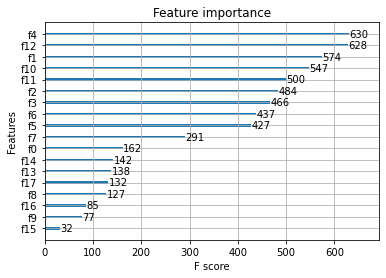

In [22]:
xgb.plot_importance(xgbr)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

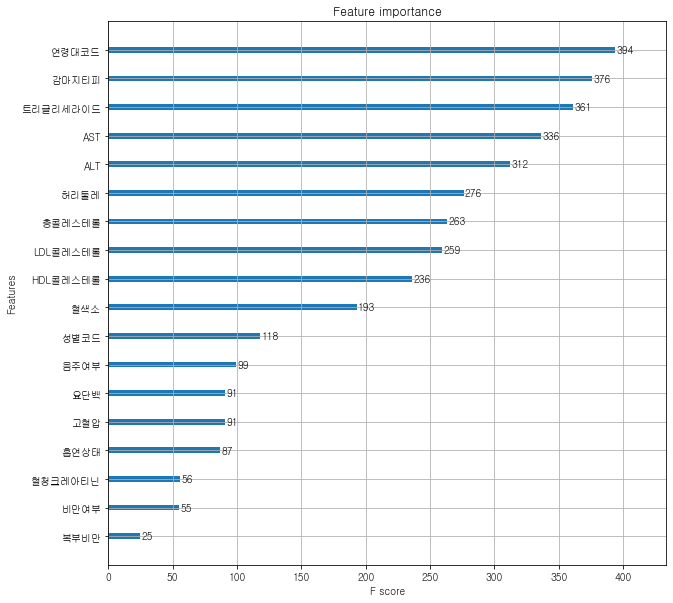

In [33]:
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

dtrain = xgb.DMatrix(X_train, label=y_train,feature_names=list(df_x.columns))

model = xgb.train(dtrain=dtrain, num_boost_round=60, params={}, \
                  maximize=False, verbose_eval=10)

fig, ax = plt.subplots(1,1,figsize=(10,10))
xgb.plot_importance(model, ax=ax)

In [10]:
df_features = df_x[important_features]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features.values, df["식전혈당"].values, test_size=0.2, random_state = 11)

In [51]:
import xgboost as xgb

from sklearn.model_selection import GridSearchCV

# XGBoost 분류기 생성
xgb_clf = xgb.XGBClassifier()

# 초모수 격자생성
xgb_param_grid = {'max_depth': [3,5,7], 
              'subsample': [0.6, 0.8, 1.0],
                  'lambda': [1,2,3]
                 }

# Create a GridSearchCV object
hr_grid = GridSearchCV(estimator=xgb_clf,
                       param_grid=xgb_param_grid,
                       scoring='roc_auc',
                       n_jobs=8,
                       cv=5,
                       refit=True, 
                       return_train_score=True)

hr_grid.fit(X_train, y_train)

[22:48:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [52]:
from sklearn.metrics import classification_report, accuracy_score
hr_pred = hr_grid.predict(X_test)
print(classification_report(y_test, hr_pred))

              precision    recall  f1-score   support

           0       0.71      0.60      0.65    184770
           1       0.65      0.76      0.70    185082

    accuracy                           0.68    369852
   macro avg       0.68      0.68      0.68    369852
weighted avg       0.68      0.68      0.68    369852



In [53]:
hr_grid_df = pd.DataFrame(hr_grid.cv_results_)
hr_grid_df.loc[:, ['mean_test_score', "params"]]

,mean_test_score,params
0,0.743128,"{'lambda': 1, 'max_depth': 3, 'subsample': 0.6}"
1,0.743376,"{'lambda': 1, 'max_depth': 3, 'subsample': 0.8}"
2,0.743215,"{'lambda': 1, 'max_depth': 3, 'subsample': 1.0}"
3,0.743838,"{'lambda': 1, 'max_depth': 5, 'subsample': 0.6}"
4,0.743839,"{'lambda': 1, 'max_depth': 5, 'subsample': 0.8}"
5,0.743905,"{'lambda': 1, 'max_depth': 5, 'subsample': 1.0}"
6,0.743632,"{'lambda': 1, 'max_depth': 7, 'subsample': 0.6}"
7,0.743697,"{'lambda': 1, 'max_depth': 7, 'subsample': 0.8}"
8,0.743835,"{'lambda': 1, 'max_depth': 7, 'subsample': 1.0}"
9,0.743315,"{'lambda': 2, 'max_depth': 3, 'subsample': 0.6}"


In [54]:
hr_grid_df[hr_grid_df['rank_test_score'] == 1]


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lambda,param_max_depth,param_subsample,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
14,92.24067,2.475009,0.542628,0.039759,2,5,1,"{'lambda': 2, 'max_depth': 5, 'subsample': 1.0}",0.744289,0.743441,...,0.743936,0.000581,1,0.744707,0.744858,0.744997,0.744722,0.744515,0.74476,0.000161


In [55]:
## 최고성능
best_score = hr_grid.best_score_
# 최고성능을 내는 행을 찾아냄
best_row = hr_grid.best_index_

# 최적 초모수: max_depth, subsample
best_max_depth     = hr_grid.best_params_["max_depth"]
best_max_subsample = hr_grid.best_params_["subsample"]

nl = '\n'
print(f'예측모형성능(AUC):  \t {best_score:.3f}{nl}\
        인덱스:           \t {best_row}{nl}\
        max_depth:      \t {best_max_depth}{nl}\
        subsample:      \t {best_max_subsample}')

예측모형성능(AUC):  	 0.744
        인덱스:           	 14
        max_depth:      	 5
        subsample:      	 1.0


In [41]:
dtrain = xgb.DMatrix(data=X_train, label = y_train)
dtest = xgb.DMatrix(data=X_test, label = y_test)

In [56]:
params = {
    'max_depth': 5,
#     'eta' : 0.08,
    'subsmaple' : 1.0,
    'objective' : 'binary:logistic',
    'eval_metric' : 'auc',
    'early_stoppings' : 100,
    'labmda': 2
}
num_rounds = 1000

In [57]:
wlist = [(dtrain,'train'),(dtest,'eval')]
xgb_model = xgb.train(params = params, dtrain = dtrain, num_boost_round = num_rounds, early_stopping_rounds=100, evals=wlist)

[23:07:19] WARNING: ..\src\learner.cc:541: 
Parameters: { early_stoppings, labmda, subsmaple } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.72580	eval-auc:0.72554
[1]	train-auc:0.73054	eval-auc:0.73059
[2]	train-auc:0.73309	eval-auc:0.73304
[3]	train-auc:0.73608	eval-auc:0.73611
[4]	train-auc:0.73695	eval-auc:0.73695
[5]	train-auc:0.73758	eval-auc:0.73757
[6]	train-auc:0.73818	eval-auc:0.73823
[7]	train-auc:0.73847	eval-auc:0.73845
[8]	train-auc:0.73899	eval-auc:0.73896
[9]	train-auc:0.73935	eval-auc:0.73930
[10]	train-auc:0.73954	eval-auc:0.73948
[11]	train-auc:0.73982	eval-auc:0.73974
[12]	train-auc:0.74032	eval-auc:0.74022
[13]	train-auc:0.74039	eval-auc:0.74028
[14]	train-auc:0.74042	eval-auc:0.74031
[15]	train-auc:0.74065	eval-auc:0.74053
[16]	train-auc:0

[194]	train-auc:0.74504	eval-auc:0.74403
[195]	train-auc:0.74504	eval-auc:0.74403
[196]	train-auc:0.74504	eval-auc:0.74403
[197]	train-auc:0.74505	eval-auc:0.74404
[198]	train-auc:0.74505	eval-auc:0.74404
[199]	train-auc:0.74506	eval-auc:0.74404
[200]	train-auc:0.74506	eval-auc:0.74403
[201]	train-auc:0.74506	eval-auc:0.74403
[202]	train-auc:0.74506	eval-auc:0.74403
[203]	train-auc:0.74506	eval-auc:0.74403
[204]	train-auc:0.74506	eval-auc:0.74403
[205]	train-auc:0.74506	eval-auc:0.74403
[206]	train-auc:0.74507	eval-auc:0.74403
[207]	train-auc:0.74507	eval-auc:0.74403
[208]	train-auc:0.74507	eval-auc:0.74403
[209]	train-auc:0.74507	eval-auc:0.74403
[210]	train-auc:0.74508	eval-auc:0.74402
[211]	train-auc:0.74508	eval-auc:0.74403
[212]	train-auc:0.74508	eval-auc:0.74403
[213]	train-auc:0.74508	eval-auc:0.74403
[214]	train-auc:0.74508	eval-auc:0.74403
[215]	train-auc:0.74508	eval-auc:0.74403
[216]	train-auc:0.74508	eval-auc:0.74403
[217]	train-auc:0.74508	eval-auc:0.74403
[218]	train-auc:

In [58]:
pred_probs = xgb_model.predict(dtest)

pred = [1 if x > 0.5 else 0 for x in pred_probs]

confusion_matrix = [[0,0],[0,0]]

count_accuracy = 0

for i in range(len(pred)):
    if pred[i] == y_test[i]:
        count_accuracy += 1
    confusion_matrix[y_test[i]][pred[i]] += 1

print('accuracy', count_accuracy / len(pred))
print('confusion_matrix', confusion_matrix)

accuracy 0.6785227604555336
confusion_matrix [[110918, 73852], [45047, 140035]]


In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
from sklearn.metrics import roc_curve

def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

In [60]:
get_clf_eval(y_test,pred)

오차행렬:
 [[110918  73852]
 [ 45047 140035]]

정확도: 0.6785
정밀도: 0.6547
재현율: 0.7566
F1: 0.7020
AUC: 0.6785


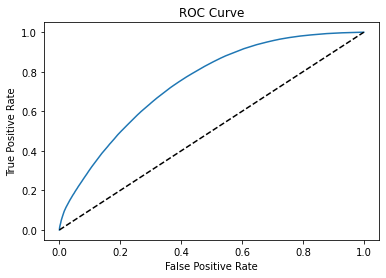

<Figure size 432x288 with 0 Axes>

In [61]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

FPR, TPR, _ = roc_curve(y_test, pred_probs)
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black') # 대각선
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
plt.clf()

In [36]:
hr_dmatrix = dtrain

cv_params = {"objective":"binary:logistic", 
             "max_depth":5}

hr_cv = xgb.cv(dtrain=hr_dmatrix, 
               params=cv_params, 
               nfold=5, 
               num_boost_round=10, 
               metrics="auc", 
               as_pandas=True)

hr_cv

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.725695,0.000280,0.725529,0.001113
1,0.730670,0.000272,0.730495,0.001135
2,0.732982,0.000262,0.732827,0.001101
3,0.735226,0.001023,0.735001,0.001613
4,0.736715,0.000629,0.736516,0.001151
5,0.737445,0.000602,0.737263,0.001032
6,0.737881,0.000600,0.737703,0.001045
7,0.738419,0.000483,0.738211,0.001027
8,0.739030,0.000350,0.738812,0.001181
9,0.739509,0.000546,0.739277,0.001056


In [105]:
# def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=100):
   
#     # get new n_estimator
#     if useTrainCV:
#         xgb_param = alg.get_xgb_params()
#         xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain['식전혈당'].values)
#         cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
#                           metrics='error', early_stopping_rounds=early_stopping_rounds)
#         alg.set_params(n_estimators=cvresult.shape[0])
#         print(alg)
    
#     # Fit the algorithm on the data
#     alg.fit(dtrain[predictors], dtrain['식전혈당'], eval_metric='error')
        
#     #Predict training set:
#     dtrain_predictions = alg.predict(dtrain[predictors])
#     dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
#     #Print model report:
#     print("\nModel Report")
#     print("Training Accuracy : %.4g" % metrics.accuracy_score(dtrain['식전혈당'].values, dtrain_predictions))

In [106]:
# from xgboost.sklearn import XGBClassifier
# from sklearn import metrics

# xgb1 = XGBClassifier(
#     learning_rate =0.1,
#     n_estimators=1000,
#     max_depth=5,
#     min_child_weight=1,
#     gamma=0,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     objective= 'binary:logistic',
#     nthread=-1,
#     scale_pos_weight=1,
#     seed=2019
# )
# modelfit(xgb1, df, important_features)

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.8, gamma=0, gpu_id=None,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=None, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=369, n_jobs=None, nthread=-1, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=1, seed=2019, subsample=0.8, tree_method=None,
              validate_parameters=None, verbosity=None)

Model Report
Training Accuracy : 0.679


In [109]:
# from sklearn.model_selection import GridSearchCV   #Perforing grid search


# param_test1 = {
#  'max_depth':range(3,10,3),
#  'min_child_weight':range(1,6,2)
# }
# gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1, 
#                                                   n_estimators=1000, 
#                                                   max_depth=5, 
#                                                   min_child_weight=1, 
#                                                   gamma=0, 
#                                                   subsample=0.8, 
#                                                   colsample_bytree=0.8,
#                                                   objective= 'binary:logistic', 
#                                                   nthread=-1, 
#                                                   scale_pos_weight=1, seed=2019),
# param_grid = param_test1, scoring='accuracy',n_jobs=-1,iid=False, cv=5, verbose=10)
# gsearch1.fit(df[important_features],df['식전혈당'])
# gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_